In [32]:
import csv

In [33]:
header = ['smiles']
data = [
    ['C=C'],
    ['C=O	'],
    ['C#N	'],
    ['CCO	'],
    ['CCC(=O)O	'],
    ['CN=C=O	'],
    ['C1=CCC=CC1	'],
    ['C1=CC=CC=C1	'],
    ['C1=C(C)C=CC=C1	'],
    ['C1CCC2CCCCC2C1'],
]

with open('smiles.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [34]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

rdkit.__version__

'2022.09.1'

In [35]:
    from rdkit.Chem import AllChem as Chem


In [36]:
smiles = 'COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O'
mol = Chem.MolFromSmiles(smiles)
print(mol)

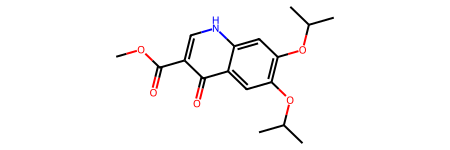

In [37]:
mol


In [38]:
smi = Chem.MolToSmiles(mol)
smi


'COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O'

In [39]:
Chem.MolToInchiKey(mol)


'VSIUFPQOEIKNCY-UHFFFAOYSA-N'

In [40]:
mol_block = Chem.MolToMolBlock(mol)
print(mol_block)


     RDKit          2D

 23 24  0  0  0  0  0  0  0  0999 V2000
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500   -1.2990    0

In [41]:
file_name = 'smiles.csv'

with open(file_name, "r") as ins:
    smiles = []
    for line in ins:
        smiles.append(line.split('\n')[0])
print('# of SMILES:', len(smiles))

# of SMILES: 11


In [42]:
smiles = [
    'C=C	'
    'C=O	'
    'C#N	'
    'CCO'
    'CCC(=O)O	'
    'CN=C=O	'
    'C1=CCC=CC1	'
    'C1=CC=CC=C1	'
    'C1=CC=CC=C1	'
    'C1CCC2CCCCC2C1	'
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]

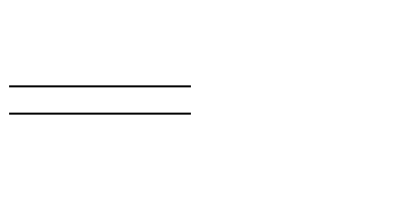

In [43]:
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))


In [44]:
import pandas as pd
from rdkit.Chem import PandasTools

In [45]:
url = 'https://raw.githubusercontent.com/XinhaoLi74/molds/master/clean_data/ESOL.csv'

esol_data = pd.read_csv(url)
esol_data.head(1)

,smiles,logSolubility
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77


In [46]:
PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='smiles')
esol_data.head(1)

,smiles,logSolubility,ROMol
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77,<rdkit.Chem.rdchem.Mol object at 0x14f4e2092dd0>


In [47]:
print(type(esol_data.ROMol[0]))


<class 'rdkit.Chem.rdchem.Mol'>


In [48]:
<class 'rdkit.Chem.rdchem.Mol'>


SyntaxError: invalid syntax (4193121967.py, line 1)

In [49]:
PandasTools.FrameToGridImage(data.head(10),  legendsCol='logSolubility', molsPerRow=5)


AttributeError: 'list' object has no attribute 'head'

In [31]:
esol_data["n_Atoms"] = esol_data['ROMol'].map(lambda x: x.GetNumAtoms())
esol_data.head(1)

,smiles,logSolubility,ROMol,n_Atoms
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77,<rdkit.Chem.rdchem.Mol object at 0x14f4e2092e40>,32


In [26]:
esol_data = esol_data.drop(['ROMol'], axis=1)
esol_data.head(1)

,smiles,logSolubility,n_Atoms
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77,32


In [27]:
smiles = 'C=C	'
mol = Chem.MolFromSmiles(smiles)
print(mol)


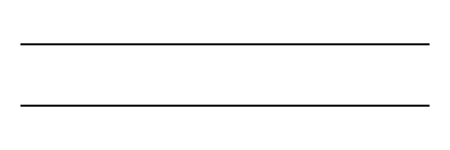

In [28]:
mol


In [29]:
smi = Chem.MolToSmiles(mol)
smi

'C=C'

In [30]:
Chem.MolToInchiKey(mol)


'VGGSQFUCUMXWEO-UHFFFAOYSA-N'